In [1]:
import os, shutil
import random
import gc  #Gabage collector for cleaning deleted data from memory

In [2]:
train_dir = 'input/train'
test_dir = 'input/test'

# train_imgs = ['../input/train/{}'.format(i) for i in os.listdir(train_dir)]  #get full data set
train_buys = ['input/train/{}'.format(i) for i in os.listdir(train_dir) if 'Buy' in i]  #get dog images
train_sells = ['input/train/{}'.format(i) for i in os.listdir(train_dir) if 'Sell' in i]  #get cat images

test_imgs = ['input/test/{}'.format(i) for i in os.listdir(test_dir)] #get test images

train_imgs = train_buys[:2000] + train_sells[:2000]  # slice the dataset and use 2000 in each class
random.shuffle(train_imgs)  # shuffle it randomly

#Clear list that are useless
del train_buys
del train_sells
gc.collect()   #collect garbage to save memory

0

In [1]:
#Import some packages to use
import cv2
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
%matplotlib inline

In [4]:
#Lets declare our image dimensions
#we are using coloured images. 
nrows = 150
ncolumns = 150
channels = 3  #change to 1 if you want to use grayscale image


#A function to read and process the images to an acceptable format for our model
def read_and_process_image(list_of_images):
    """
    Returns two arrays: 
        X is an array of resized images
        y is an array of labels
    """
    X = [] # images
    y = [] # labels
    
    for image in list_of_images:
        X.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (nrows,ncolumns), interpolation=cv2.INTER_CUBIC))  #Read the image
        #get the labels
        if 'Buy' in image:
            y.append(1)
        elif 'Sell' in image:
            y.append(0)
    
    return X, y

In [5]:
#get the train and label data
X, y = read_and_process_image(train_imgs)

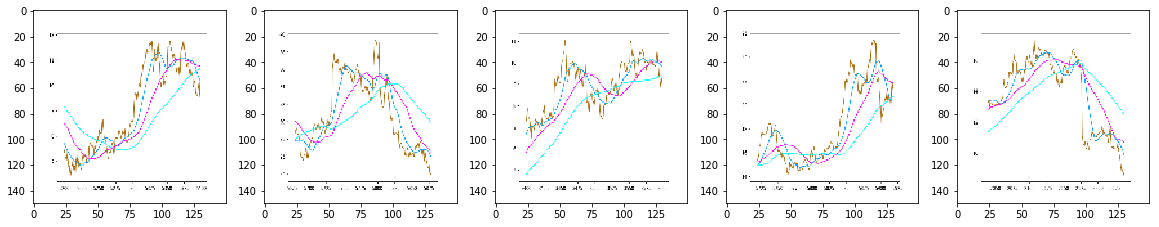

In [7]:
#Lets view some of the pics
plt.figure(figsize=(20,10))
columns = 5
for i in range(columns):
    plt.subplot(5 / columns + 1, columns, i + 1)
    plt.imshow(X[i])

Text(0.5,1,'Labels for Sells and Buys')

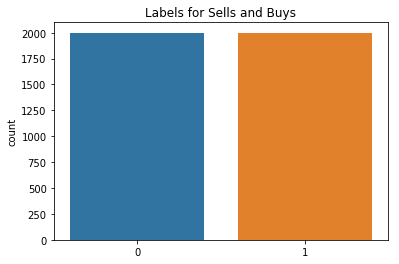

In [8]:
del train_imgs
gc.collect()
#Convert list to numpy array
X = np.array(X)
y = np.array(y)

#Lets plot the label to be sure we just have two class
sns.countplot(y)
plt.title('Labels for Sells and Buys')

In [9]:
print("Shape of train images is:", X.shape)
print("Shape of labels is:", y.shape)

Shape of train images is: (4000, 150, 150, 3)
Shape of labels is: (4000,)


In [10]:
#Lets split the data into train and test set
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=2)

In [11]:
#clear memory
del X
del y
gc.collect()

#get the length of the train and validation data
ntrain = len(X_train)
nval = len(X_val)

#We will use a batch size of 32. Note: batch size should be a factor of 2.***4,8,16,32,64...***
batch_size = 32

In [15]:
import keras
conv_base = keras.applications.inception_resnet_v2.InceptionResNetV2(include_top=False, weights='imagenet', input_shape=(150,150,3))
#conv_base = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(150,150,3))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/keras/utils/conv_utils.py:82: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.copy(kernel[slices])


In [16]:
conv_base.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv2d_407 (Conv2D)             (None, 74, 74, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_407 (BatchN (None, 74, 74, 32)   96          conv2d_407[0][0]                 
__________________________________________________________________________________________________
activation_407 (Activation)     (None, 74, 74, 32)   0           batch_normalization_407[0][0]    
__________________________________________________________________________________________________
conv2d_408

batch_normalization_421 (BatchN (None, 16, 16, 32)   96          conv2d_421[0][0]                 
__________________________________________________________________________________________________
batch_normalization_424 (BatchN (None, 16, 16, 64)   192         conv2d_424[0][0]                 
__________________________________________________________________________________________________
activation_419 (Activation)     (None, 16, 16, 32)   0           batch_normalization_419[0][0]    
__________________________________________________________________________________________________
activation_421 (Activation)     (None, 16, 16, 32)   0           batch_normalization_421[0][0]    
__________________________________________________________________________________________________
activation_424 (Activation)     (None, 16, 16, 64)   0           batch_normalization_424[0][0]    
__________________________________________________________________________________________________
block35_1_

batch_normalization_436 (BatchN (None, 16, 16, 64)   192         conv2d_436[0][0]                 
__________________________________________________________________________________________________
activation_431 (Activation)     (None, 16, 16, 32)   0           batch_normalization_431[0][0]    
__________________________________________________________________________________________________
activation_433 (Activation)     (None, 16, 16, 32)   0           batch_normalization_433[0][0]    
__________________________________________________________________________________________________
activation_436 (Activation)     (None, 16, 16, 64)   0           batch_normalization_436[0][0]    
__________________________________________________________________________________________________
block35_3_mixed (Concatenate)   (None, 16, 16, 128)  0           activation_431[0][0]             
                                                                 activation_433[0][0]             
          

conv2d_443 (Conv2D)             (None, 16, 16, 32)   10240       block35_4_ac[0][0]               
__________________________________________________________________________________________________
conv2d_445 (Conv2D)             (None, 16, 16, 32)   9216        activation_444[0][0]             
__________________________________________________________________________________________________
conv2d_448 (Conv2D)             (None, 16, 16, 64)   27648       activation_447[0][0]             
__________________________________________________________________________________________________
batch_normalization_443 (BatchN (None, 16, 16, 32)   96          conv2d_443[0][0]                 
__________________________________________________________________________________________________
batch_normalization_445 (BatchN (None, 16, 16, 32)   96          conv2d_445[0][0]                 
__________________________________________________________________________________________________
batch_norm

conv2d_460 (Conv2D)             (None, 16, 16, 64)   27648       activation_459[0][0]             
__________________________________________________________________________________________________
batch_normalization_455 (BatchN (None, 16, 16, 32)   96          conv2d_455[0][0]                 
__________________________________________________________________________________________________
batch_normalization_457 (BatchN (None, 16, 16, 32)   96          conv2d_457[0][0]                 
__________________________________________________________________________________________________
batch_normalization_460 (BatchN (None, 16, 16, 64)   192         conv2d_460[0][0]                 
__________________________________________________________________________________________________
activation_455 (Activation)     (None, 16, 16, 32)   0           batch_normalization_455[0][0]    
__________________________________________________________________________________________________
activation

batch_normalization_469 (BatchN (None, 16, 16, 32)   96          conv2d_469[0][0]                 
__________________________________________________________________________________________________
batch_normalization_472 (BatchN (None, 16, 16, 64)   192         conv2d_472[0][0]                 
__________________________________________________________________________________________________
activation_467 (Activation)     (None, 16, 16, 32)   0           batch_normalization_467[0][0]    
__________________________________________________________________________________________________
activation_469 (Activation)     (None, 16, 16, 32)   0           batch_normalization_469[0][0]    
__________________________________________________________________________________________________
activation_472 (Activation)     (None, 16, 16, 64)   0           batch_normalization_472[0][0]    
__________________________________________________________________________________________________
block35_9_

conv2d_485 (Conv2D)             (None, 7, 7, 160)    143360      activation_484[0][0]             
__________________________________________________________________________________________________
batch_normalization_485 (BatchN (None, 7, 7, 160)    480         conv2d_485[0][0]                 
__________________________________________________________________________________________________
activation_485 (Activation)     (None, 7, 7, 160)    0           batch_normalization_485[0][0]    
__________________________________________________________________________________________________
conv2d_483 (Conv2D)             (None, 7, 7, 192)    208896      mixed_6a[0][0]                   
__________________________________________________________________________________________________
conv2d_486 (Conv2D)             (None, 7, 7, 192)    215040      activation_485[0][0]             
__________________________________________________________________________________________________
batch_norm

batch_normalization_496 (BatchN (None, 7, 7, 128)    384         conv2d_496[0][0]                 
__________________________________________________________________________________________________
activation_496 (Activation)     (None, 7, 7, 128)    0           batch_normalization_496[0][0]    
__________________________________________________________________________________________________
conv2d_497 (Conv2D)             (None, 7, 7, 160)    143360      activation_496[0][0]             
__________________________________________________________________________________________________
batch_normalization_497 (BatchN (None, 7, 7, 160)    480         conv2d_497[0][0]                 
__________________________________________________________________________________________________
activation_497 (Activation)     (None, 7, 7, 160)    0           batch_normalization_497[0][0]    
__________________________________________________________________________________________________
conv2d_495

conv2d_510 (Conv2D)             (None, 7, 7, 192)    215040      activation_509[0][0]             
__________________________________________________________________________________________________
batch_normalization_507 (BatchN (None, 7, 7, 192)    576         conv2d_507[0][0]                 
__________________________________________________________________________________________________
batch_normalization_510 (BatchN (None, 7, 7, 192)    576         conv2d_510[0][0]                 
__________________________________________________________________________________________________
activation_507 (Activation)     (None, 7, 7, 192)    0           batch_normalization_507[0][0]    
__________________________________________________________________________________________________
activation_510 (Activation)     (None, 7, 7, 192)    0           batch_normalization_510[0][0]    
__________________________________________________________________________________________________
block17_7_

batch_normalization_521 (BatchN (None, 7, 7, 160)    480         conv2d_521[0][0]                 
__________________________________________________________________________________________________
activation_521 (Activation)     (None, 7, 7, 160)    0           batch_normalization_521[0][0]    
__________________________________________________________________________________________________
conv2d_519 (Conv2D)             (None, 7, 7, 192)    208896      block17_9_ac[0][0]               
__________________________________________________________________________________________________
conv2d_522 (Conv2D)             (None, 7, 7, 192)    215040      activation_521[0][0]             
__________________________________________________________________________________________________
batch_normalization_519 (BatchN (None, 7, 7, 192)    576         conv2d_519[0][0]                 
__________________________________________________________________________________________________
batch_norm

conv2d_531 (Conv2D)             (None, 7, 7, 192)    208896      block17_12_ac[0][0]              
__________________________________________________________________________________________________
conv2d_534 (Conv2D)             (None, 7, 7, 192)    215040      activation_533[0][0]             
__________________________________________________________________________________________________
batch_normalization_531 (BatchN (None, 7, 7, 192)    576         conv2d_531[0][0]                 
__________________________________________________________________________________________________
batch_normalization_534 (BatchN (None, 7, 7, 192)    576         conv2d_534[0][0]                 
__________________________________________________________________________________________________
activation_531 (Activation)     (None, 7, 7, 192)    0           batch_normalization_531[0][0]    
__________________________________________________________________________________________________
activation

batch_normalization_544 (BatchN (None, 7, 7, 128)    384         conv2d_544[0][0]                 
__________________________________________________________________________________________________
activation_544 (Activation)     (None, 7, 7, 128)    0           batch_normalization_544[0][0]    
__________________________________________________________________________________________________
conv2d_545 (Conv2D)             (None, 7, 7, 160)    143360      activation_544[0][0]             
__________________________________________________________________________________________________
batch_normalization_545 (BatchN (None, 7, 7, 160)    480         conv2d_545[0][0]                 
__________________________________________________________________________________________________
activation_545 (Activation)     (None, 7, 7, 160)    0           batch_normalization_545[0][0]    
__________________________________________________________________________________________________
conv2d_543

batch_normalization_557 (BatchN (None, 7, 7, 160)    480         conv2d_557[0][0]                 
__________________________________________________________________________________________________
activation_557 (Activation)     (None, 7, 7, 160)    0           batch_normalization_557[0][0]    
__________________________________________________________________________________________________
conv2d_555 (Conv2D)             (None, 7, 7, 192)    208896      block17_18_ac[0][0]              
__________________________________________________________________________________________________
conv2d_558 (Conv2D)             (None, 7, 7, 192)    215040      activation_557[0][0]             
__________________________________________________________________________________________________
batch_normalization_555 (BatchN (None, 7, 7, 192)    576         conv2d_555[0][0]                 
__________________________________________________________________________________________________
batch_norm

batch_normalization_566 (BatchN (None, 3, 3, 288)    864         conv2d_566[0][0]                 
__________________________________________________________________________________________________
batch_normalization_569 (BatchN (None, 3, 3, 320)    960         conv2d_569[0][0]                 
__________________________________________________________________________________________________
activation_564 (Activation)     (None, 3, 3, 384)    0           batch_normalization_564[0][0]    
__________________________________________________________________________________________________
activation_566 (Activation)     (None, 3, 3, 288)    0           batch_normalization_566[0][0]    
__________________________________________________________________________________________________
activation_569 (Activation)     (None, 3, 3, 320)    0           batch_normalization_569[0][0]    
__________________________________________________________________________________________________
max_poolin

conv2d_579 (Conv2D)             (None, 3, 3, 192)    399360      block8_2_ac[0][0]                
__________________________________________________________________________________________________
batch_normalization_579 (BatchN (None, 3, 3, 192)    576         conv2d_579[0][0]                 
__________________________________________________________________________________________________
activation_579 (Activation)     (None, 3, 3, 192)    0           batch_normalization_579[0][0]    
__________________________________________________________________________________________________
conv2d_580 (Conv2D)             (None, 3, 3, 224)    129024      activation_579[0][0]             
__________________________________________________________________________________________________
batch_normalization_580 (BatchN (None, 3, 3, 224)    672         conv2d_580[0][0]                 
__________________________________________________________________________________________________
activation

batch_normalization_591 (BatchN (None, 3, 3, 192)    576         conv2d_591[0][0]                 
__________________________________________________________________________________________________
activation_591 (Activation)     (None, 3, 3, 192)    0           batch_normalization_591[0][0]    
__________________________________________________________________________________________________
conv2d_592 (Conv2D)             (None, 3, 3, 224)    129024      activation_591[0][0]             
__________________________________________________________________________________________________
batch_normalization_592 (BatchN (None, 3, 3, 224)    672         conv2d_592[0][0]                 
__________________________________________________________________________________________________
activation_592 (Activation)     (None, 3, 3, 224)    0           batch_normalization_592[0][0]    
__________________________________________________________________________________________________
conv2d_590

conv2d_604 (Conv2D)             (None, 3, 3, 224)    129024      activation_603[0][0]             
__________________________________________________________________________________________________
batch_normalization_604 (BatchN (None, 3, 3, 224)    672         conv2d_604[0][0]                 
__________________________________________________________________________________________________
activation_604 (Activation)     (None, 3, 3, 224)    0           batch_normalization_604[0][0]    
__________________________________________________________________________________________________
conv2d_602 (Conv2D)             (None, 3, 3, 192)    399360      block8_8_ac[0][0]                
__________________________________________________________________________________________________
conv2d_605 (Conv2D)             (None, 3, 3, 256)    172032      activation_604[0][0]             
__________________________________________________________________________________________________
batch_norm

In [17]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  #Sigmoid function at the end because we have just two classes

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Model)  (None, 3, 3, 1536)        54336736  
_________________________________________________________________
flatten_1 (Flatten)          (None, 13824)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               3539200   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 57,876,193
Trainable params: 57,815,649
Non-trainable params: 60,544
_________________________________________________________________


In [19]:
print('Number of trainable weights before freezing the conv base:', len(model.trainable_weights))
conv_base.trainable = False
print('Number of trainable weights after freezing the conv base:', len(model.trainable_weights))

Number of trainable weights before freezing the conv base: 492
Number of trainable weights after freezing the conv base: 4


In [20]:
#We'll use the RMSprop optimizer with a learning rate of 0.0001
#We'll use binary_crossentropy loss because its a binary classification
from keras import optimizers

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5), metrics=['acc'])

In [21]:
#Lets create the augmentation configuration
#This helps prevent overfitting, since we are using a small dataset
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img

train_datagen = ImageDataGenerator(rescale=1./255,   #Scale the image between 0 and 1
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)  #We do not augment validation data. we only perform rescale

In [22]:
#Create the image generators
train_generator = train_datagen.flow(X_train, y_train,batch_size=batch_size)
val_generator = val_datagen.flow(X_val, y_val, batch_size=batch_size)

In [24]:
#The training part
#We train for 64 epochs with about 100 steps per epoch
history = model.fit_generator(train_generator,
                              steps_per_epoch=ntrain // batch_size,
                              epochs=5,
                              validation_data=val_generator,
                              validation_steps=nval // batch_size)

Epoch 1/5
100/100 [==============================] - 966s 10s/step - loss: 0.6224 - acc: 0.6575 - val_loss: 0.6765 - val_acc: 0.5763
Epoch 2/5
100/100 [==============================] - 875s 9s/step - loss: 0.6174 - acc: 0.6663 - val_loss: 0.7034 - val_acc: 0.5475
Epoch 3/5
100/100 [==============================] - 868s 9s/step - loss: 0.6158 - acc: 0.6644 - val_loss: 0.6748 - val_acc: 0.5725
Epoch 4/5
100/100 [==============================] - 900s 9s/step - loss: 0.6085 - acc: 0.6613 - val_loss: 0.7009 - val_acc: 0.5650
Epoch 5/5
100/100 [==============================] - 1002s 10s/step - loss: 0.6085 - acc: 0.6787 - val_loss: 0.6719 - val_acc: 0.5737


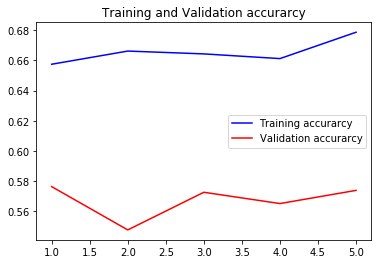

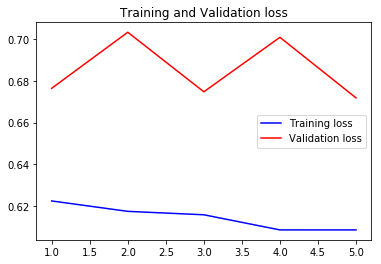

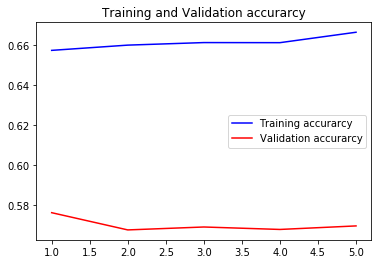

In [25]:
#Save the model
model.save_weights('model_wieghts.h5')
model.save('model_keras.h5')


#lets plot the train and val curve
import matplotlib.pyplot as plt

#get the details form the history object
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

def smooth_plot(points, factor=0.7):
    smooth_pts = []
    for point in points:
        if smooth_pts:
            previous = smooth_pts[-1]
            smooth_pts.append(previous * factor + point * (1 - factor))
        else:
            smooth_pts.append(point)
    return smooth_pts

#Plot figure
plt.plot(epochs, smooth_plot(acc), 'b', label='Training accurarcy')
plt.plot(epochs, smooth_plot(val_acc), 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()
plt.show()

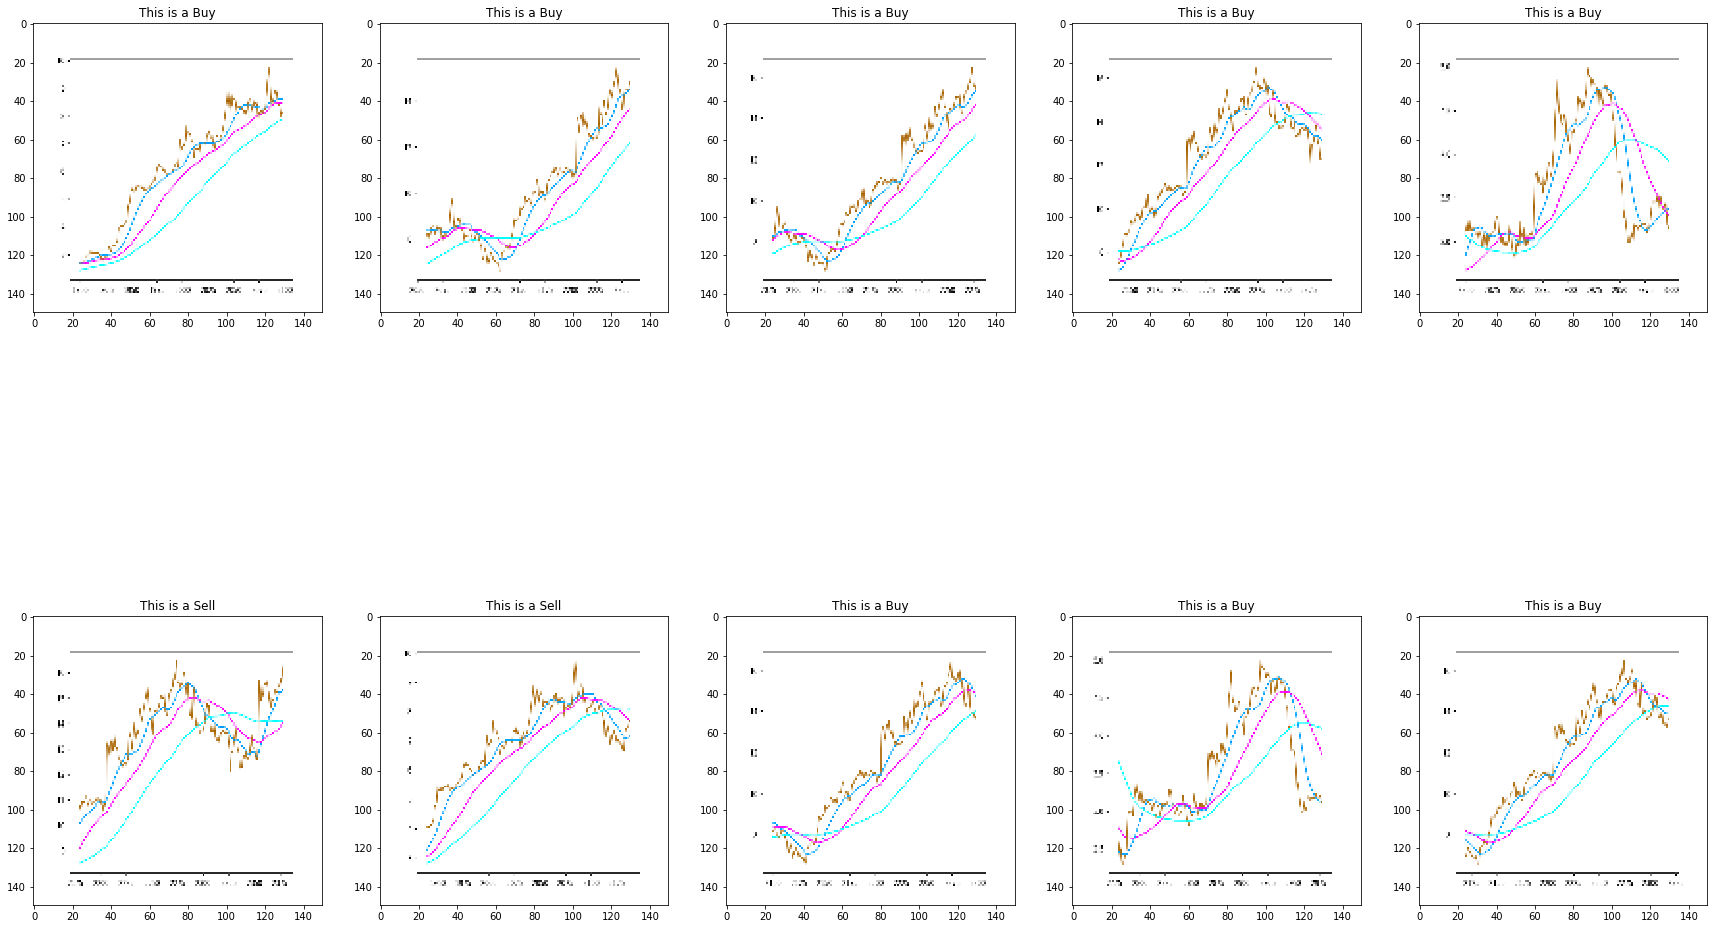

In [27]:
#Now lets predict on the first 10 Images of the test set
X_test, y_test = read_and_process_image(test_imgs[0:10]) #Y_test in this case will be empty.
x = np.array(X_test)
test_datagen = ImageDataGenerator(rescale=1./255)

i = 0
columns = 5
text_labels = []
plt.figure(figsize=(30,20))
for batch in test_datagen.flow(x, batch_size=1):
    pred = model.predict(batch)
    if pred > 0.5:
        text_labels.append('Buy')
    else:
        text_labels.append('Sell')
    plt.subplot(5 / columns + 1, columns, i + 1)
    plt.title('This is a ' + text_labels[i])
    imgplot = plt.imshow(batch[0])
    i += 1
    if i % 10 == 0:
        break
plt.show()